In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore") 

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


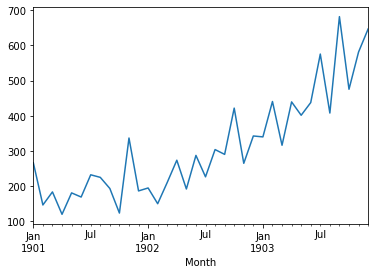

In [2]:
def parser(X):
    return datetime.strptime('190'+X, '%Y-%m')

df = pd.read_csv('data/monthly-shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
print(df.head())
df.plot()
plt.show()

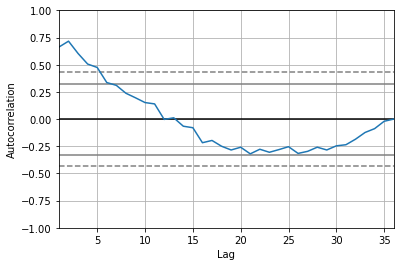

In [3]:
autocorrelation_plot(df)
plt.show()

- first 5 lags -> significant positive correlation
- AR parameter - 5 (good starting point)

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Fri, 22 Jan 2021   AIC                            406.340
Time:                        16:49:27   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

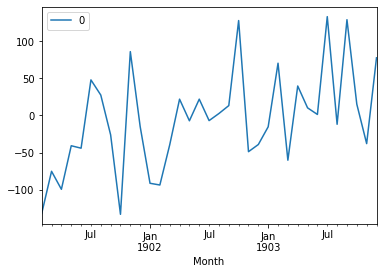

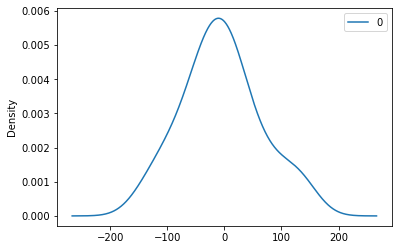

                0
count   35.000000
mean    -5.495195
std     68.132883
min   -133.296603
25%    -42.477848
50%     -7.186507
75%     24.748377
max    133.238010


In [4]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

- we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model
- we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero
- there is a bias in the prediction (a non-zero mean in the residuals)

test RMSE: 83.417


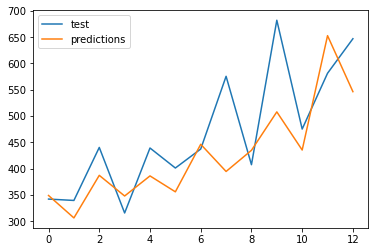

In [5]:
# rolling forecast ARIMA model
X = df.values
size = int(len(X)*0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# wqalk forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

rmse = np.sqrt(mean_squared_error(test, predictions))
print('test RMSE: %.3f' %rmse)

plt.plot(test, label='test')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()